In [1]:
from src.SynthSeg import SynthSeg
from src.Labels import Labels
from src.ABCD import ABCD
from src.StatisticalAnalysis import StatisticalAnalysis
import pandas as pd
import ggseg

In [2]:
# https://github.com/ggseg/python-ggseg/tree/main/ggseg/data/
synthseg_to_ggseg = {
    'ctx-rh-postcentral': 'postcentral_right',
    'ctx-lh-postcentral': 'postcentral_left',
    'ctx-rh-supramarginal': 'supramarginal_right',
    'ctx-rh-precentral': 'precentral_right',
    'ctx-rh-precentral': 'precentral_right',
    'ctx-rh-lateraloccipital': 'lateraloccipital_right',
    'ctx-lh-parsorbitalis': 'parsorbitalis_left',
    'right cerebellum white matter': 'Cerebellum-White-Matter',
    'left cerebellum white matter': 'Cerebellum-White-Matter',
    'left caudate': 'Left-Caudate',
    'left hippocampus': 'Left-Hippocampus',
    'right hippocampus': 'Right-Hippocampus',
    'brain-stem': 'Brain-Stem',
    'right ventral DC': 'Right-VentralDC',
    'left cerebral cortex': 'Cerebellum-Cortex',
    "4th ventricle": "4th-Ventricle",
    "3rd ventricle": "3rd-Ventricle",
}

#### Labels

In [3]:
depr = Labels().depr_df
depr.value_counts()

0    1485
1     366
Name: depress_dsm5, dtype: int64

In [4]:
anx = Labels().anx_df
anx.value_counts()

0    1485
1     384
Name: anxdisord_dsm5, dtype: int64

In [5]:
adhd = Labels().adhd_df
adhd.value_counts()

0    1485
1     348
Name: adhd_dsm5, dtype: int64

In [6]:
opposit = Labels().opposit_df
opposit.value_counts()

0    1485
1     399
Name: opposit_dsm5, dtype: int64

In [7]:
conduct = Labels().conduct_df
conduct.value_counts()

0    1485
1     332
Name: conduct_dsm5, dtype: int64

In [8]:
somaticpr = Labels().somaticpr_df
somaticpr.value_counts()

0    1485
1     465
Name: somaticpr_dsm5, dtype: int64

# Conduct disorder

In [15]:
synthseg = SynthSeg(
    subjects=conduct.index,
    run_qc=True,
    run_qc_min_score=0.65,
    run_qc_max_failed_regions=1
    )

print("Full synthseg shape", synthseg.df.shape)
print("QC synthseg shape", synthseg.qc_df.shape)
print()
print("No. failed subj:", synthseg.df.shape[0] - synthseg.qc_df.shape[0])

Full synthseg shape (1750, 101)
QC synthseg shape (1416, 101)

No. failed subj: 334


In [16]:
# Create overall df
synthseg_with_labels = synthseg.df.join(conduct)

synthseg_conditions = StatisticalAnalysis(
    synthseg.df[synthseg_with_labels["conduct_dsm5"] == 0],
    synthseg.df[synthseg_with_labels["conduct_dsm5"] == 1],
    ind=True,
)
synthseg_sig_vols, synthseg_all_stats = synthseg_conditions.compare()

synthseg_sig_vols

,feature,p_value
23,right hippocampus,0.000003
11,left hippocampus,0.000003
46,ctx-lh-supramarginal,0.000031
2,left cerebral cortex,0.000060
17,right cerebral cortex,0.000081
...,...,...
68,ctx-rh-frontalpole,0.035022
62,ctx-rh-rostralanteriorcingulate,0.036152
55,ctx-rh-medialorbitofrontal,0.037954
27,ctx-lh-caudalanteriorcingulate,0.040869


In [17]:
# Create overall df
synthseg_qc_with_labels = synthseg.qc_df.join(conduct)

synthseg_qc_conditions = StatisticalAnalysis(
    synthseg.qc_df[synthseg_qc_with_labels["conduct_dsm5"] == 0],
    synthseg.qc_df[synthseg_qc_with_labels["conduct_dsm5"] == 1],
    ind=True,
)
synthseg_qc_sig_vols, synthseg_qc_all_stats = synthseg_qc_conditions.compare()

synthseg_qc_sig_vols

,feature,p_value
10,left hippocampus,0.000026
2,left cerebral cortex,0.000040
16,right cerebral cortex,0.000063
21,right hippocampus,0.000071
65,ctx-rh-supramarginal,0.000080
...,...,...
45,ctx-lh-transversetemporal,0.029604
53,ctx-rh-medialorbitofrontal,0.031277
47,ctx-rh-bankssts,0.032428
25,ctx-lh-bankssts,0.044751


# Somaticpr

In [12]:
synthseg = SynthSeg(
    subjects=somaticpr.index,
    run_qc=True,
    run_qc_min_score=0.65,
    run_qc_max_failed_regions=1
    )

print("Full synthseg shape", synthseg.df.shape)
print("QC synthseg shape", synthseg.qc_df.shape)
print()
print("No. failed subj:", synthseg.df.shape[0] - synthseg.qc_df.shape[0])

Full synthseg shape (1883, 101)
QC synthseg shape (1511, 101)

No. failed subj: 372


In [13]:
# Create overall df
synthseg_with_labels = synthseg.df.join(somaticpr)

synthseg_conditions = StatisticalAnalysis(
    synthseg.df[synthseg_with_labels["somaticpr_dsm5"] == 0],
    synthseg.df[synthseg_with_labels["somaticpr_dsm5"] == 1],
    ind=True,
)
synthseg_sig_vols, synthseg_all_stats = synthseg_conditions.compare()

synthseg_sig_vols

,feature,p_value
2,ctx-rh-lateraloccipital,0.025705
0,left lateral ventricle,0.029463
1,4th ventricle,0.042307


In [18]:
# Create overall df
synthseg_qc_with_labels = synthseg.qc_df.join(somaticpr)

synthseg_qc_conditions = StatisticalAnalysis(
    synthseg.qc_df[synthseg_qc_with_labels["somaticpr_dsm5"] == 0],
    synthseg.qc_df[synthseg_qc_with_labels["somaticpr_dsm5"] == 1],
    ind=True,
)
synthseg_qc_sig_vols, synthseg_qc_all_stats = synthseg_qc_conditions.compare()

synthseg_qc_sig_vols

,feature,p_value
3,right hippocampus,0.003534
1,left hippocampus,0.005103
4,ctx-lh-paracentral,0.011447
6,ctx-rh-precentral,0.015646
0,left cerebral cortex,0.039797
5,ctx-rh-paracentral,0.041493
2,right cerebral cortex,0.044410


# TODO: Oppositional defiance

In [9]:
synthseg = SynthSeg(
    subjects=opposit.index,
    run_qc=True,
    run_qc_min_score=0.65,
    run_qc_max_failed_regions=1
    )

print("Full synthseg shape", synthseg.df.shape)
print("QC synthseg shape", synthseg.qc_df.shape)
print()
print("No. failed subj:", synthseg.df.shape[0] - synthseg.qc_df.shape[0])

Full synthseg shape (1810, 101)
QC synthseg shape (1461, 101)

No. failed subj: 349


In [11]:
# Create overall df
synthseg_with_labels = synthseg.df.join(opposit)

synthseg_conditions = StatisticalAnalysis(
    synthseg.df[synthseg_with_labels["opposit_dsm5"] == 0],
    synthseg.df[synthseg_with_labels["opposit_dsm5"] == 1],
    ind=True,
)
synthseg_sig_vols, synthseg_all_stats = synthseg_conditions.compare()

synthseg_sig_vols

,feature,p_value
11,ctx-rh-parstriangularis,0.002277
9,ctx-rh-lateraloccipital,0.004672
4,ctx-lh-parsorbitalis,0.005050
3,ctx-lh-lingual,0.015362
15,ctx-rh-temporalpole,0.020604
2,ctx-lh-isthmuscingulate,0.021861
16,ctx-rh-transversetemporal,0.023548
7,ctx-rh-entorhinal,0.029031
8,ctx-rh-isthmuscingulate,0.030335
14,ctx-rh-frontalpole,0.033598


In [14]:
# Create overall df
synthseg_qc_with_labels = synthseg.qc_df.join(opposit)

synthseg_qc_conditions = StatisticalAnalysis(
    synthseg.qc_df[synthseg_qc_with_labels["opposit_dsm5"] == 0],
    synthseg.qc_df[synthseg_qc_with_labels["opposit_dsm5"] == 1],
    ind=True,
)
synthseg_qc_sig_vols, synthseg_qc_all_stats = synthseg_qc_conditions.compare()

synthseg_qc_sig_vols

,feature,p_value
0,left hippocampus,0.017831
2,right hippocampus,0.025839
1,right inferior lateral ventricle,0.037830


# ADHD

In [58]:
synthseg = SynthSeg(
    subjects=adhd.index,
    run_qc=True,
    run_qc_min_score=0.65,
    run_qc_max_failed_regions=1
    )

print("Full synthseg shape", synthseg.df.shape)
print("QC synthseg shape", synthseg.qc_df.shape)
print()
print("No. failed subj:", synthseg.df.shape[0] - synthseg.qc_df.shape[0])

Full synthseg shape (1756, 101)
QC synthseg shape (1422, 101)

No. failed subj: 334


In [59]:
# Create overall df
synthseg_with_labels = synthseg.df.join(adhd)

synthseg_conditions = StatisticalAnalysis(
    synthseg.df[synthseg_with_labels["adhd_dsm5"] == 0],
    synthseg.df[synthseg_with_labels["adhd_dsm5"] == 1],
    ind=True,
)
synthseg_sig_vols, synthseg_all_stats = synthseg_conditions.compare()

synthseg_sig_vols

,feature,p_value
0,4th ventricle,0.003658
1,left hippocampus,0.005082
2,right hippocampus,0.006927


/nadata/cnl/home/mwagner/projects/SynthSeg/abcd-code/analysis/src/StatisticalAnalysis.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset_1["dataset"] = self.dataset_names[0]
/nadata/cnl/home/mwagner/projects/SynthSeg/abcd-code/analysis/src/StatisticalAnalysis.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset_2["dataset"] = self.dataset_names[1]
/nadata/cnl/home/mwagner/projects/SynthSeg/abcd-code/analysis/src/StatisticalAnalysis.py:96: SettingWithCopyWarning: 
A value is tryin

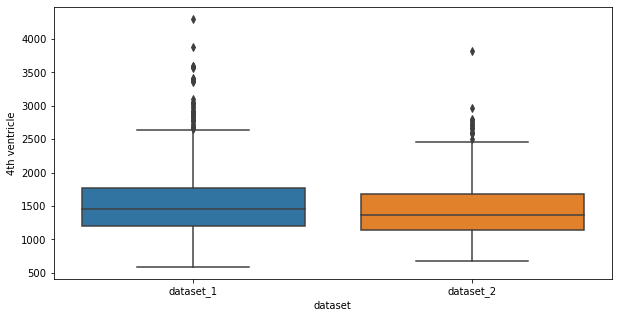

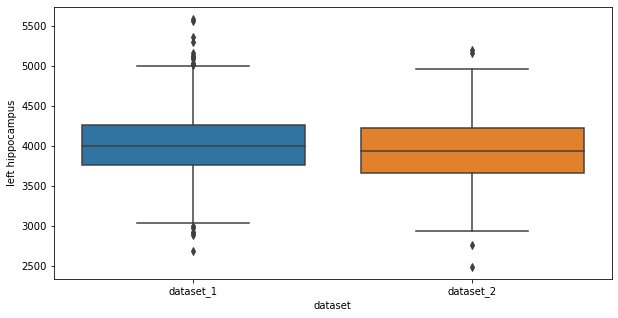

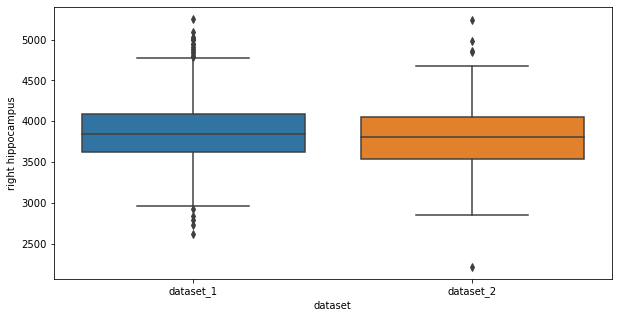

In [61]:
for f in synthseg_sig_vols["feature"]:
    synthseg_conditions.plot_feat(f)

In [60]:
# Actual volume sizes
for f in synthseg_sig_vols["feature"]:
    print("ROI:", f)
    print("Control:", round(synthseg.df[synthseg_with_labels["adhd_dsm5"] == 0][f].mean()))
    print("ADHD:", round(synthseg.df[synthseg_with_labels["adhd_dsm5"] == 1][f].mean()))
    print()

ROI: 4th ventricle
Control: 1532
ADHD: 1463

ROI: left hippocampus
Control: 4004
ADHD: 3936

ROI: right hippocampus
Control: 3868
ADHD: 3804



In [31]:
# Create overall df
synthseg_qc_with_labels = synthseg.qc_df.join(adhd)

synthseg_qc_conditions = StatisticalAnalysis(
    synthseg.qc_df[synthseg_qc_with_labels["adhd_dsm5"] == 0],
    synthseg.qc_df[synthseg_qc_with_labels["adhd_dsm5"] == 1],
    ind=True,
)
synthseg_qc_sig_vols, synthseg_qc_all_stats = synthseg_qc_conditions.compare()

synthseg_qc_sig_vols

,feature,p_value
1,4th ventricle,0.003058
2,left hippocampus,0.014246
4,right hippocampus,0.029264
3,right cerebellum white matter,0.034009
0,left cerebellum white matter,0.042758


# Anxiety

In [63]:
synthseg = SynthSeg(
    subjects=anx.index,
    run_qc=True,
    run_qc_min_score=0.65,
    run_qc_max_failed_regions=1
    )

print("Full synthseg shape", synthseg.df.shape)
print("QC synthseg shape", synthseg.qc_df.shape)
print()
print("No. failed subj:", synthseg.df.shape[0] - synthseg.qc_df.shape[0])

Full synthseg shape (1805, 101)
QC synthseg shape (1457, 101)

No. failed subj: 348


In [64]:
# Create overall df
synthseg_with_labels = synthseg.df.join(anx)

synthseg_conditions = StatisticalAnalysis(
    synthseg.df[synthseg_with_labels["anxdisord_dsm5"] == 0],
    synthseg.df[synthseg_with_labels["anxdisord_dsm5"] == 1],
    ind=True,
)
synthseg_sig_vols, synthseg_all_stats = synthseg_conditions.compare()

synthseg_sig_vols

,feature,p_value
2,ctx-rh-lateraloccipital,0.002399
0,3rd ventricle,0.039777
1,ctx-lh-parsorbitalis,0.048062


In [65]:
# Actual volume sizes
for f in synthseg_sig_vols["feature"]:
    print("ROI:", f)
    print("Control:", round(synthseg.df[synthseg_with_labels["anxdisord_dsm5"] == 0][f].mean()))
    print("ADHD:", round(synthseg.df[synthseg_with_labels["anxdisord_dsm5"] == 1][f].mean()))
    print()

ROI: ctx-rh-lateraloccipital
Control: 9711
ADHD: 9892

ROI: 3rd ventricle
Control: 641
ADHD: 647

ROI: ctx-lh-parsorbitalis
Control: 2332
ADHD: 2354



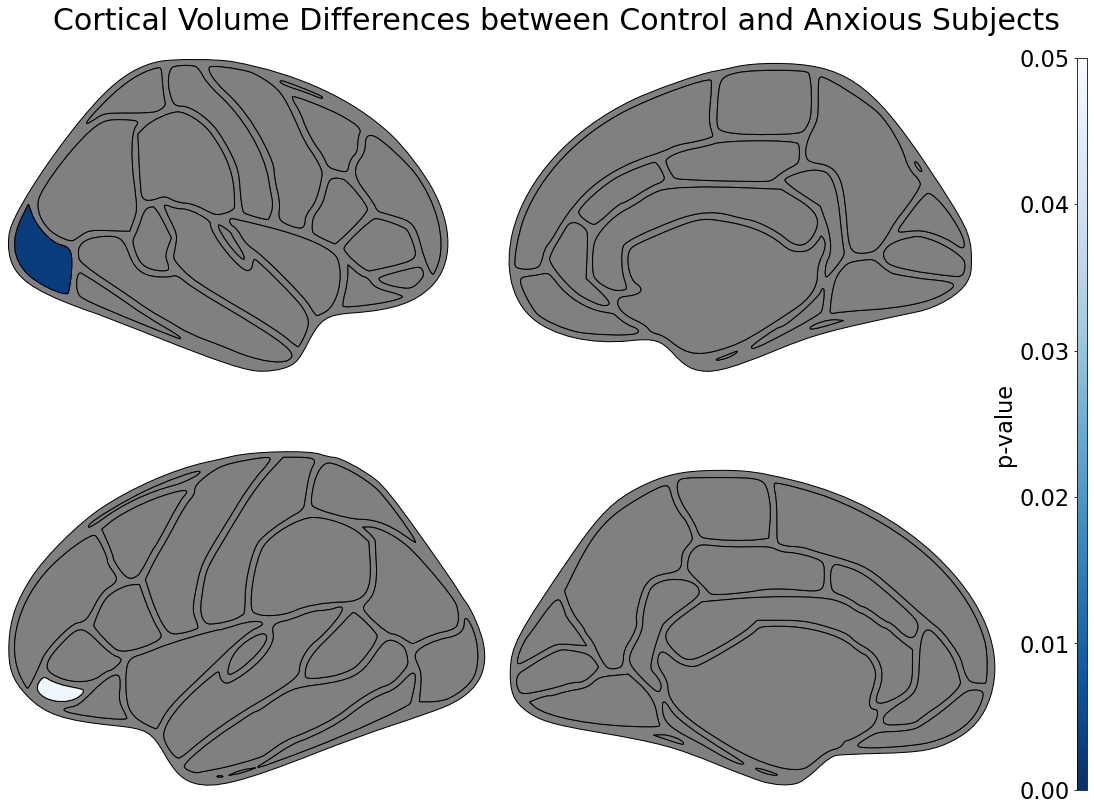

In [52]:
data = {}

for f,p in zip(synthseg_sig_vols['feature'], synthseg_sig_vols['p_value']):
    data[synthseg_to_ggseg[f]] = p
    
ggseg.plot_dk(
    data, 
    cmap='Blues_r', 
    figsize=(15,15),
    background='w', 
    edgecolor='k', 
    bordercolor='gray',          
    ylabel='p-value', 
    title='Cortical Volume Differences between Control and Anxious Subjects',
    vminmax=[0, 0.05],
    fontsize=30
)

In [55]:
# Create overall df
synthseg_qc_with_labels = synthseg.qc_df.join(anx)

synthseg_qc_conditions = StatisticalAnalysis(
    synthseg.qc_df[synthseg_qc_with_labels["anxdisord_dsm5"] == 0],
    synthseg.qc_df[synthseg_qc_with_labels["anxdisord_dsm5"] == 1],
    ind=True,
)
synthseg_qc_sig_vols, synthseg_qc_all_stats = synthseg_qc_conditions.compare()

synthseg_qc_sig_vols

,feature,p_value
1,ctx-rh-lateraloccipital,0.001629
0,ctx-lh-parsorbitalis,0.036120


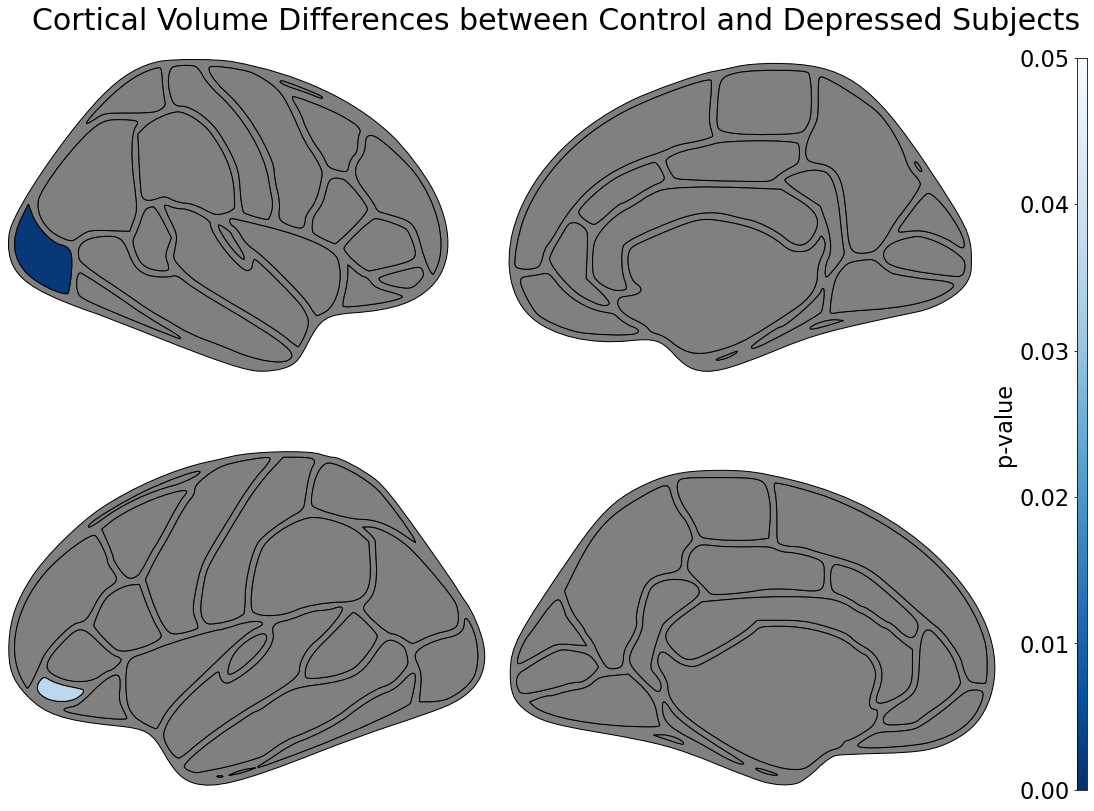

In [56]:
data = {}

for f,p in zip(synthseg_qc_sig_vols['feature'], synthseg_qc_sig_vols['p_value']):
    data[synthseg_to_ggseg[f]] = p
    
ggseg.plot_dk(
    data, 
    cmap='Blues_r', 
    figsize=(15,15),
    background='w', 
    edgecolor='k', 
    bordercolor='gray',          
    ylabel='p-value', 
    title='Cortical Volume Differences between Control and Depressed Subjects',
    vminmax=[0, 0.05],
    fontsize=30
)

# Depression

In [15]:
synthseg = SynthSeg(
    subjects=depr.index,
    run_qc=True,
    run_qc_min_score=0.65,
    run_qc_max_failed_regions=1
    )

print("Full synthseg shape", synthseg.df.shape)
print("QC synthseg shape", synthseg.qc_df.shape)
print()
print("No. failed subj:", synthseg.df.shape[0] - synthseg.qc_df.shape[0])

Full synthseg shape (1782, 101)
QC synthseg shape (1430, 101)

No. failed subj: 352


In [17]:
# Create overall df
synthseg_with_labels = synthseg.df.join(depr)

synthseg_conditions = StatisticalAnalysis(
    synthseg.df[synthseg_with_labels["depress_dsm5"] == 0],
    synthseg.df[synthseg_with_labels["depress_dsm5"] == 1],
    ind=True,
)
synthseg_sig_vols, synthseg_all_stats = synthseg_conditions.compare()

synthseg_sig_vols

,feature,p_value
4,ctx-rh-postcentral,0.003214
3,ctx-lh-postcentral,0.007333
6,ctx-rh-supramarginal,0.020202
2,right cerebellum white matter,0.027419
5,ctx-rh-precentral,0.029681
0,left caudate,0.034681
1,left hippocampus,0.048953


In [18]:
# Actual volume sizes
for f in synthseg_sig_vols["feature"]:
    print("ROI:", f)
    print("Control:", round(synthseg.df[synthseg_with_labels["depress_dsm5"] == 0][f].mean()))
    print("Depressed:", round(synthseg.df[synthseg_with_labels["depress_dsm5"] == 1][f].mean()))
    print()
    
# Plotting
#for f in synthseg_sig_vols["feature"]:
#    synthseg_conditions.plot_feat(f)

ROI: ctx-rh-postcentral
Control: 8662
Depressed: 8411

ROI: ctx-lh-postcentral
Control: 8468
Depressed: 8243

ROI: ctx-rh-supramarginal
Control: 9845
Depressed: 9649

ROI: right cerebellum white matter
Control: 13244
Depressed: 13020

ROI: ctx-rh-precentral
Control: 10467
Depressed: 10248

ROI: left caudate
Control: 4288
Depressed: 4223

ROI: left hippocampus
Control: 4004
Depressed: 3962



In [14]:
# change names to match ggseg 
data = {}

for f,p in zip(synthseg_sig_vols['feature'], synthseg_sig_vols['p_value']):
    data[synthseg_to_ggseg[f]] = p
    
data['precentral_right'] = 0.04957708186675222

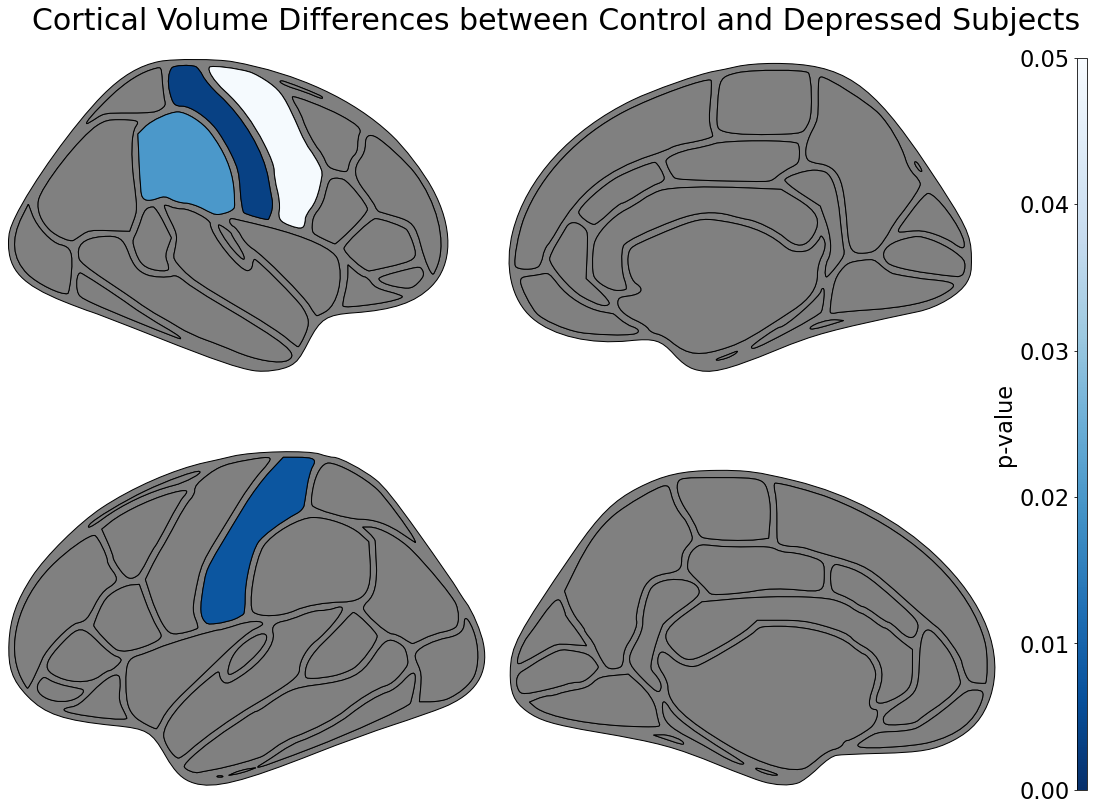

In [15]:
import ggseg
ggseg.plot_dk(
    data, 
    cmap='Blues_r', 
    figsize=(15,15),
    background='w', 
    edgecolor='k', 
    bordercolor='gray',          
    ylabel='p-value', 
    title='Cortical Volume Differences between Control and Depressed Subjects',
    vminmax=[0, 0.05],
    fontsize=30
)

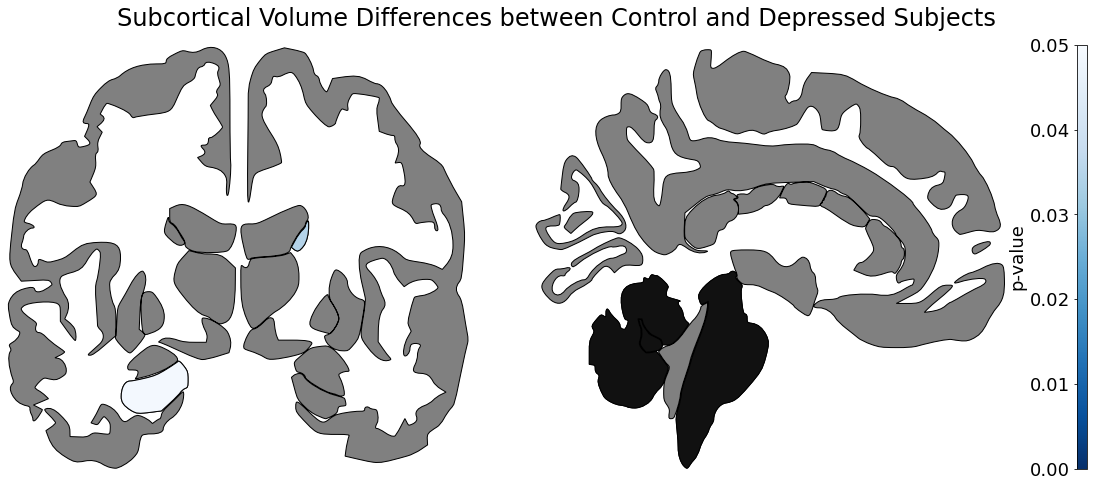

In [16]:
ggseg.plot_aseg(
    data, 
    cmap='Blues_r',
    figsize=(15,15),
    background='w', 
    edgecolor='k', 
    bordercolor='gray',
    ylabel='p-value', 
    title='Subcortical Volume Differences between Control and Depressed Subjects',
    vminmax=[0, 0.05],
    fontsize=24
    )

## SynthSeg (with qc) depressed vs control

In [19]:
# Create overall df
synthseg_qc_with_labels = synthseg.qc_df.join(depr)

In [21]:
synthseg_qc_conditions = StatisticalAnalysis(
    synthseg.qc_df[synthseg_qc_with_labels["depress_dsm5"] == 0],
    synthseg.qc_df[synthseg_qc_with_labels["depress_dsm5"] == 1],
    ind=True,
)
synthseg_qc_sig_vols, synthseg_qc_all_stats = synthseg_qc_conditions.compare()

synthseg_qc_sig_vols

,feature,p_value
8,ctx-rh-postcentral,0.001683
7,ctx-lh-postcentral,0.003268
5,right cerebellum white matter,0.010176
4,left hippocampus,0.020209
3,brain-stem,0.028090
2,left caudate,0.031763
6,right ventral DC,0.038110
1,left cerebellum white matter,0.041498
10,ctx-rh-supramarginal,0.042807
9,ctx-rh-precentral,0.045504


In [22]:
for f in synthseg_qc_sig_vols["feature"]:
    print("ROI:", f)
    print("Control:", round(synthseg.qc_df[synthseg_qc_with_labels["depress_dsm5"] == 0][f].mean()))
    print("Depressed:", round(synthseg.qc_df[synthseg_qc_with_labels["depress_dsm5"] == 1][f].mean()))
    print()

ROI: ctx-rh-postcentral
Control: 8678
Depressed: 8385

ROI: ctx-lh-postcentral
Control: 8479
Depressed: 8214

ROI: right cerebellum white matter
Control: 13246
Depressed: 12946

ROI: left hippocampus
Control: 3989
Depressed: 3927

ROI: brain-stem
Control: 21573
Depressed: 21244

ROI: left caudate
Control: 4319
Depressed: 4246

ROI: right ventral DC
Control: 4221
Depressed: 4157

ROI: left cerebellum white matter
Control: 13893
Depressed: 13632

ROI: ctx-rh-supramarginal
Control: 9848
Depressed: 9635

ROI: ctx-rh-precentral
Control: 10497
Depressed: 10263

ROI: left cerebral cortex
Control: 301665
Depressed: 297218



In [23]:
# change names to match ggseg 
data_qc = {}

for f,p in zip(synthseg_qc_sig_vols['feature'], synthseg_qc_sig_vols['p_value']):
    data_qc[synthseg_to_ggseg[f]] = p
    
data_qc

NameError: name 'synthseg_to_ggseg' is not defined

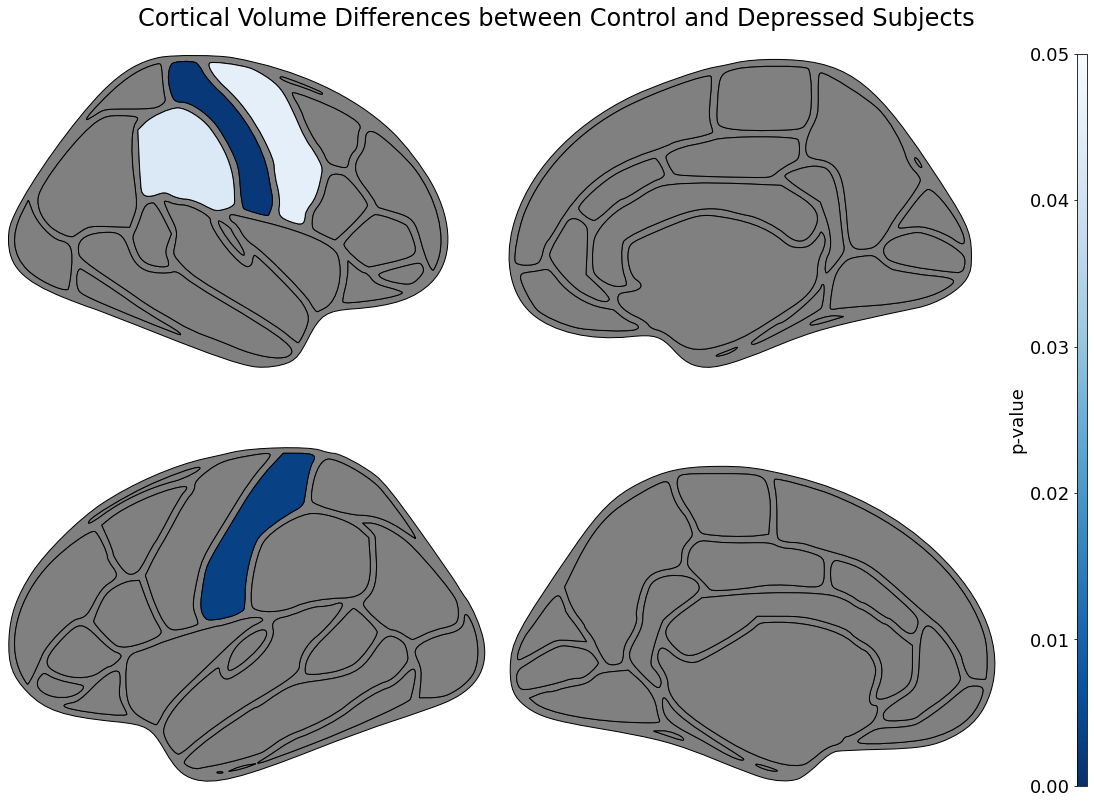

In [ ]:
import ggseg
ggseg.plot_dk(
    data_qc, 
    cmap='Blues_r', 
    figsize=(15,15),
    background='w', 
    edgecolor='k', 
    bordercolor='gray',          
    ylabel='p-value', 
    title='Cortical Volume Differences between Control and Depressed Subjects',
    vminmax=[0, 0.05],
    fontsize=24
)

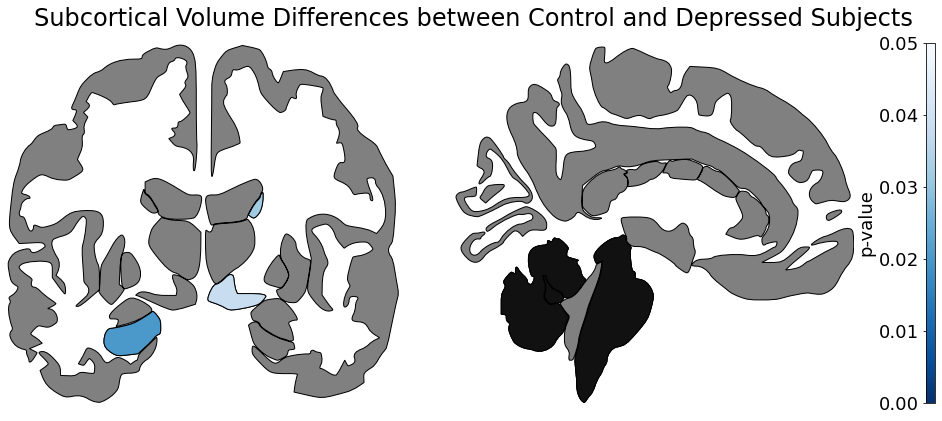

In [ ]:
ggseg.plot_aseg(data_qc, 
                cmap='Blues_r',
                background='w', 
                edgecolor='k', 
                bordercolor='gray',
                ylabel='p-value', 
                title='Subcortical Volume Differences between Control and Depressed Subjects',
                vminmax=[0, 0.05],
                fontsize=24
                )